In [1]:

from matplotlib import pyplot as plt
import os
import numpy as np
import glob
import os

## astropy
import astropy.units as u
from astropy.table import Table

## calin
from cta.nectarcam.feb.I_NmcConfig import NmcConfig

## ctapipe
from ctapipe_io_nectarcam import NectarCAMEventSource 
from ctapipe.io import event_source, EventSeeker

import scipy.stats as scsp
from scipy.stats import poisson                                                                                                             

from fit_ses_v6 import *
#import seaborn as sns



/local/home/ttaverni/anaconda3/envs/nectarchain-dev/lib/python3.7/site-packages/corsikaio/subblocks/dtypes.py:20: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  return np.dtype(dict(**dt))


In [2]:
plt.rcParams['figure.figsize'] = [15, 7]

In [3]:
        MC_file_path = '/media/ttaverni/Transcend/MC_s/Heide/test_ff_10k_08pe.simtel.gz'
        
        inputfile_reader_MC = event_source(
            input_url = MC_file_path,
            max_events=10000)

        all_wfs = []
        for ii, event in enumerate(inputfile_reader_MC):
            all_wfs.append(event.r0.tel[1].waveform[0,:10])
        wfs_MC = np.array(all_wfs)

In [4]:
        #data_file_path = "/media/ttaverni/Transcend/data/speR1/NectarCAM.Run1554.000[0-9].fits.fz"
        data_file_path = "/media/ttaverni/Transcend/data/speR1/NectarCAM.Run1482.0000.fits.fz"
        
        inputfile_reader = NectarCAMEventSource(
            input_url = data_file_path,
            max_events=10000)

        cfg = inputfile_reader.camera_config
        pix_ids = cfg.expected_pixels_id[:10]
        
        all_wfs = []
        for ii, event in enumerate(inputfile_reader):
            all_wfs.append(event.r0.tel[event.r0.tels_with_data[0]].waveform[1,pix_ids])
        wfs_data = np.array(all_wfs)

/local/home/ttaverni/anaconda3/envs/nectarchain-dev/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/local/home/ttaverni/anaconda3/envs/nectarchain-dev/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


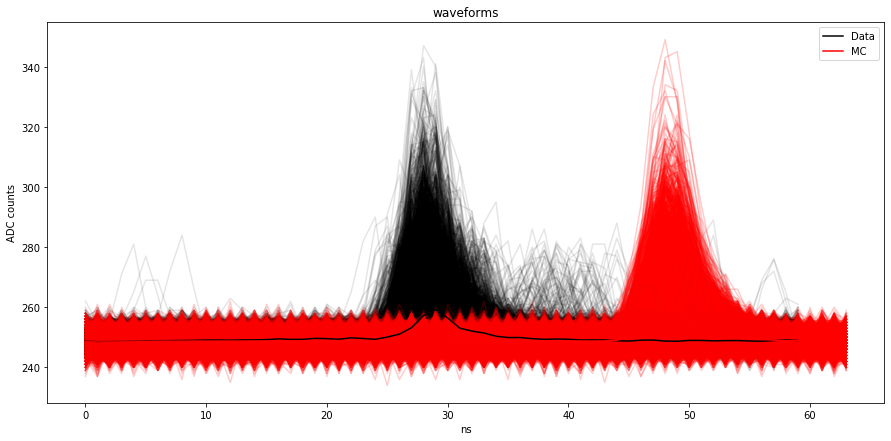

In [5]:
p = plt.plot(wfs_data[:,0,:1000].T,color='black',alpha=.1)
p = plt.plot(wfs_MC[:,2,:1000].T,color='red',alpha=.2)
l = plt.gca().set_xlabel("ns")
l = plt.gca().set_ylabel("ADC counts")
t = plt.gca().set_title('waveforms')

p = plt.plot(wfs_data[:,7,:1000].mean(axis=0),color='black',alpha=1,label='Data')
p = plt.plot(wfs_MC[:,2,:1000].mean(axis=0),color='red',alpha=1,label = 'MC')
l = plt.legend()

=== Gain ::  59.07323290371017 p.e. ------------- ==== Light I 0.8472614339054525
48


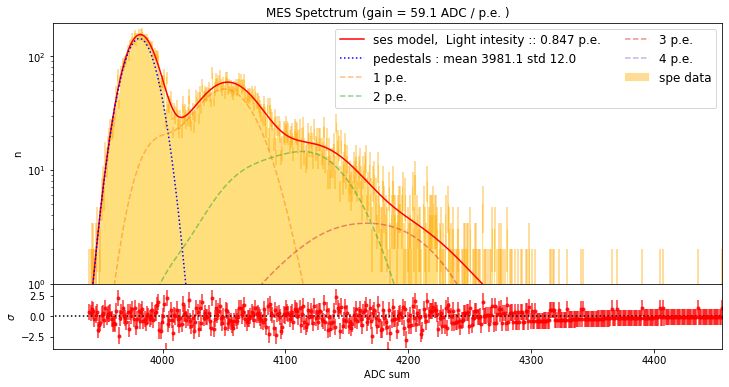

In [12]:
pp_ = 0.45
pix_index=2

wfs = wfs_MC[:,pix_index]
Smax = wfs.mean(axis=0).argmax()

Q_array1_MC = wfs[:,Smax-6:Smax+10].sum(axis=1)
res_MC,err,gain = fit_ses_2g(Q_array1_MC,plot=True)
print(Smax)

=== Gain ::  58.21389926460019 p.e. ------------- ==== Light I 0.6611341006923607
28


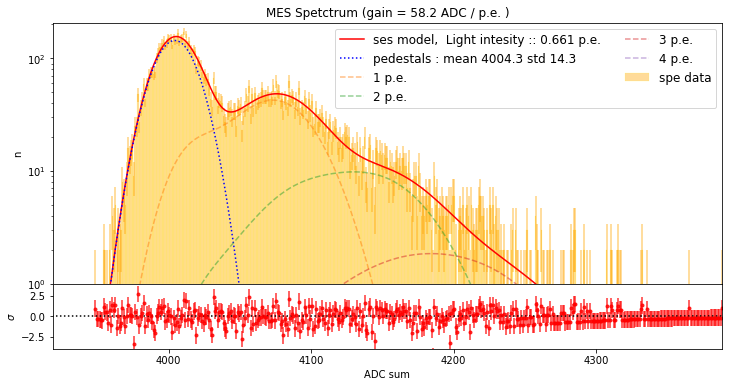

In [7]:
pp_ = 0.45
pix_index=0

wfs = wfs_data[:,pix_index]
Smax = wfs.mean(axis=0).argmax()

Q_array1_data = wfs[:,Smax-6:Smax+10].sum(axis=1)
res_data,err,gain = fit_ses_2g(Q_array1_data,plot=True)
print(Smax)

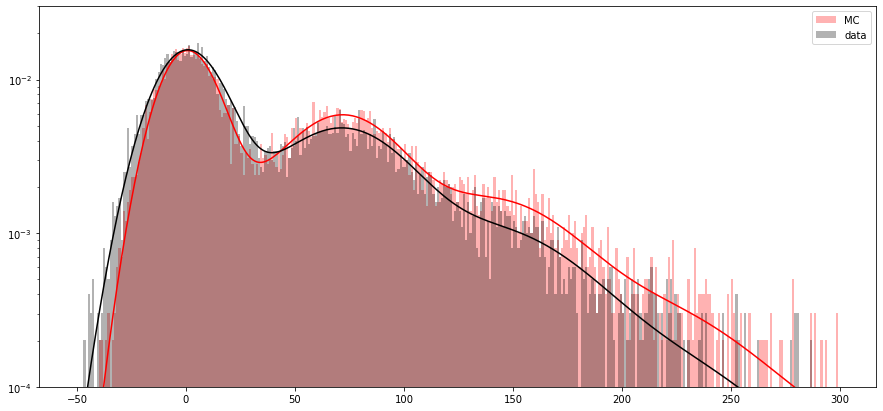

In [13]:
bins = np.arange(-50,300,1)
xx = (bins[1:]+bins[:-1])/2
h = plt.hist(Q_array1_MC-res_MC[1],  bins=bins,color='red',    alpha=.3, density=1,\
             label='MC')
p = plt.plot(xx,mes2g(xx,res_MC[0],0,res_MC[2],res_MC[3],res_MC[4]),color='red')


h = plt.hist(Q_array1_data-res_data[1],bins=bins,color='black',alpha=.3, density=1,\
             label='data')
p = plt.plot(xx,mes2g(xx,res_data[0],0,res_data[2],res_data[3],res_data[4]),color='black')

ax = plt.gca()

ax.set_ylim(1e-4,3e-2)
ax.set_yscale('log')
ax.legend()

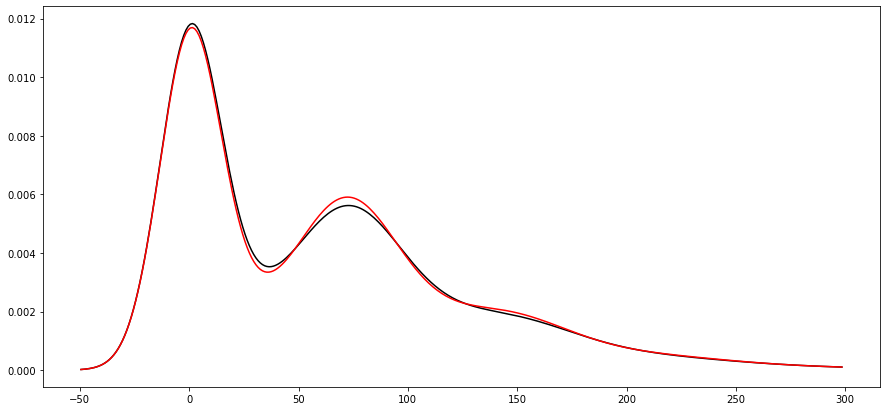

In [14]:
p = plt.plot(xx,mes2g(xx,1,0,14,res_data[3],res_data[4]),color='black')
p = plt.plot(xx,mes2g(xx,1,0,14,res_MC[3],res_MC[4]),color='red')
#plt.gca().set_yscale('log')

In [10]:
res_data

array([6.61134101e-01, 4.00430918e+03, 1.42828095e+01, 4.94163049e-01,
       7.02715139e+01])

In [11]:
res_MC

array([8.77266450e-01, 3.98730752e+03, 1.09690700e+01, 4.75070410e-01,
       6.66427763e+01])